In [1]:
#Load the Data
import pandas as pd

df = pd.read_csv("../data/togo-dapaong_qc.csv")  
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


In [2]:
#Summary Stats & Missing Value Report
df.describe()

# Missing values
missing = df.isna().sum()
missing[missing > 0]

# % missing
missing_percent = (missing / len(df)) * 100
missing_percent[missing_percent > 5]

Comments    100.0
dtype: float64

In [3]:
#Outlier Detection (Z-score)
from scipy.stats import zscore

key_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = df[key_cols].apply(zscore)

# Flag outliers where |Z| > 3
outliers = (z_scores.abs() > 3)
df_outliers = df[outliers.any(axis=1)]
df_outliers.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
4985,2021-10-28 11:06,1139.0,805.1,466.1,1172.0,1154.0,29.8,70.8,2.2,2.6,0.4,298.6,13.4,977,0,0.0,44.7,50.2,NaN
5410,2021-10-28 18:11,-1.2,0.0,0.0,0.0,0.0,29.7,63.5,6.6,9.7,1.6,122.1,14.3,976,0,0.0,30.0,29.5,NaN
5411,2021-10-28 18:12,-1.0,0.0,0.0,0.0,0.0,29.3,62.4,6.9,8.9,1.2,128.7,10.8,976,0,0.0,29.9,29.5,NaN
5413,2021-10-28 18:14,-0.8,0.0,0.0,0.0,0.0,28.6,63.7,7.1,8.9,1.1,127.9,14.4,976,0,0.0,29.5,29.2,NaN
5420,2021-10-28 18:21,-1.3,0.0,0.0,0.0,0.0,27.7,64.5,6.1,8.9,1.3,123.2,14.4,977,0,0.0,28.4,28.2,NaN


In [4]:
#Basic Cleaning
df_clean = df.copy()

key_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
for col in key_cols:
    if df_clean[col].isna().sum() > 0:
        df_clean[col] = df_clean[col].fillna(df_clean[col].median())

df_clean.to_csv("../data/togo_clean.csv", index=False)

df_clean.head()
df_clean.isna().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

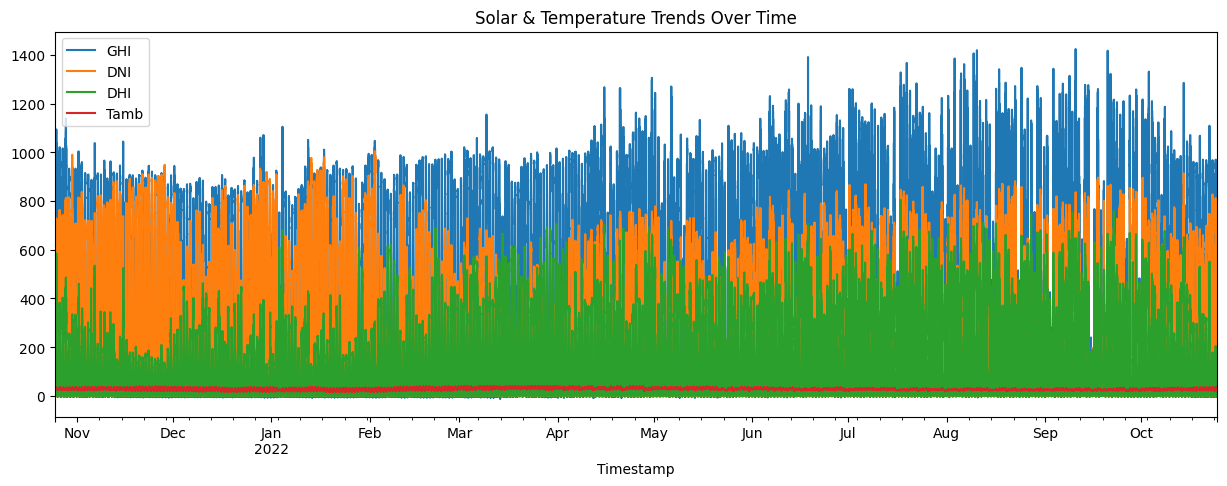

In [5]:
#Time Series Analysis
import matplotlib.pyplot as plt

df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])

df_clean.set_index('Timestamp')[['GHI', 'DNI', 'DHI', 'Tamb']].plot(figsize=(15, 5))
plt.title("Solar & Temperature Trends Over Time")
plt.show()

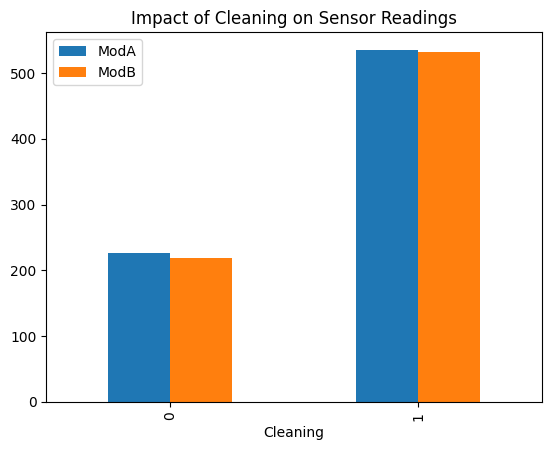

In [7]:
#Cleaning Impact
df_clean.groupby('Cleaning')[['ModA', 'ModB']].mean().plot(kind='bar')
plt.title("Impact of Cleaning on Sensor Readings")
plt.show()

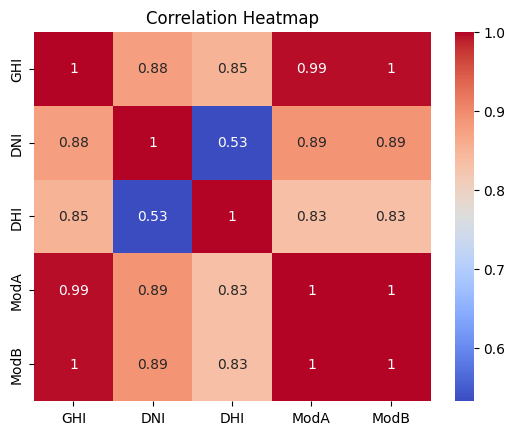

In [8]:
#Correlation Heatmap
import seaborn as sns

corr = df_clean[['GHI', 'DNI', 'DHI', 'ModA', 'ModB']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

<Axes: xlabel='WS', ylabel='GHI'>

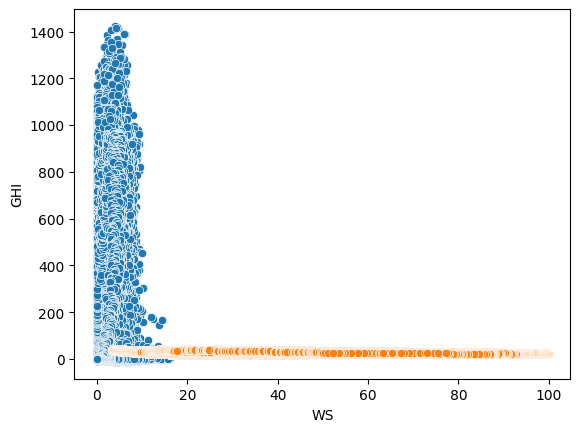

In [9]:
#Scatter Plots & Wind Analysis
sns.scatterplot(data=df_clean, x='WS', y='GHI')
sns.scatterplot(data=df_clean, x='RH', y='Tamb')

<Axes: xlabel='RH', ylabel='Tamb'>

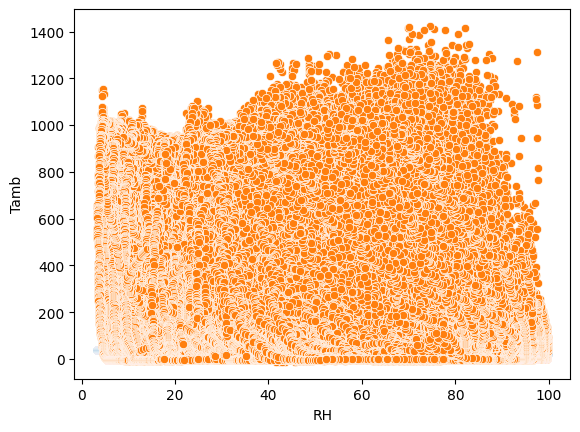

In [9]:
#Temperature & Humidity Relationship
sns.scatterplot(data=df_clean, x='RH', y='Tamb')
sns.scatterplot(data=df_clean, x='RH', y='GHI')

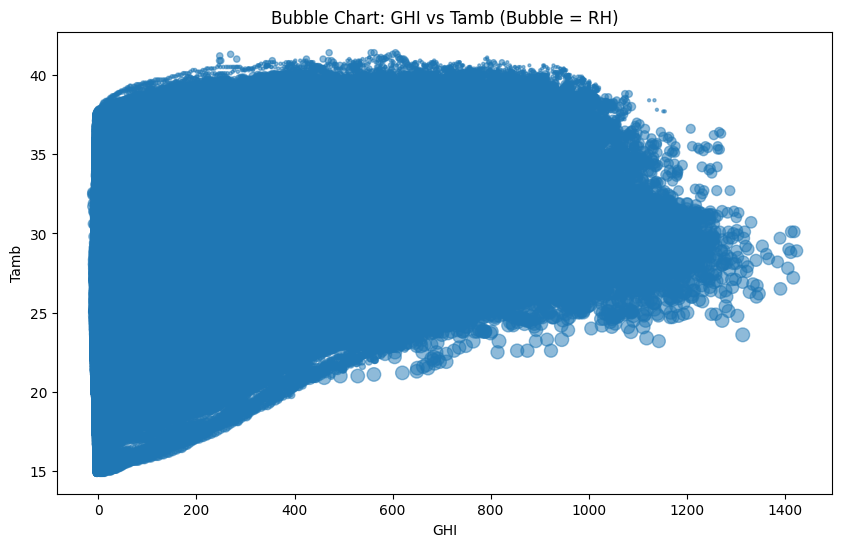

In [10]:
#Bubble Chart
plt.figure(figsize=(10,6))
plt.scatter(df_clean['GHI'], df_clean['Tamb'], s=df_clean['RH'], alpha=0.5)
plt.xlabel("GHI")
plt.ylabel("Tamb")
plt.title("Bubble Chart: GHI vs Tamb (Bubble = RH)")
plt.show()